In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Review of Text Processing(BOW) and Data Sample Clustering(Kmeans)
- Transform text data into numerical vectors, also called bag of words
- Group or cluster data samples using Kmeans clustering

## Text Processing
A part of this field is transforming text into numerical vectors. We want to do this so that we can build models based on this text data, but we can only do so if that data is represented numerically

### What is a Bag Of Words?
This is a numerical metric where the rows are sentences, and columsn are unique words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = [
    'Hello world this is Andrey',
    'Hello my name is Andrey',
    'iPhones are really cool',
    'what is my iPhone?'
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(sentences)

print(vectorizer.get_feature_names())
bow.toarray()

['andrey', 'are', 'cool', 'hello', 'iphone', 'iphones', 'is', 'my', 'name', 'really', 'this', 'what', 'world']


array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]])

**1 means word is present in sentence, 0 means it is absent**
> There is also no specific order of the words, just presence or absence

## Data Clustering
- This is an unsupervised learning algorithm
- Clustering is used when we do not have labeled data, and want to put them into groups(clusters)
- A very popular clustering mechanism is K-means clustering, where it finds a fixed number (k) clusters in a specific dataset. But there are a lot of other options as well.

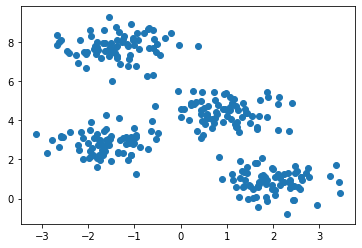

In [14]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=.6)

_ = plt.scatter(X[:, 0], X[:, 1])

Now looking at this plot, our goal is to identify, in this case, the 4 clusters from this dataset

In [17]:
from sklearn.cluster import KMeans

kcluster = KMeans(n_clusters=4)

kcluster.fit(X)

kcluster.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263]])

These cluster centers are the centers of clusters that was found by the sklearn KMeans cluster module

### The question now is how do we figure out what the best 'k' is? Because usually we do not know what the best number of clusters is going to be...

There are two aproaches to solving this problem which is called the **Elbow Method**:
- Distortion Method
- Inertia Method

#### Distortion Method
Essentially for numbers 1-k, which is our number of potential clusters, we want to compute the sum of the euclidean distances of all the points from the k centers that our KMeans model finds, take the smallest one, and then average this over all the points and plot them. We should see an elbow like shape and the optimal number of clusters is the one that is at the tip of the elbow...

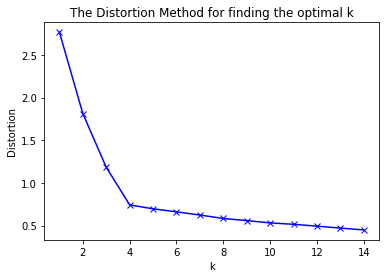

In [18]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 15)

for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
_= plt.title('The Distortion Method for finding the optimal k')

So we can see in this case that k would be 4, which is indeed accurate

#### Inertia Method
This is very similar to the Distortion method, but we are now taking the squared sum of the euclidian distances between every point and its closest cluster center

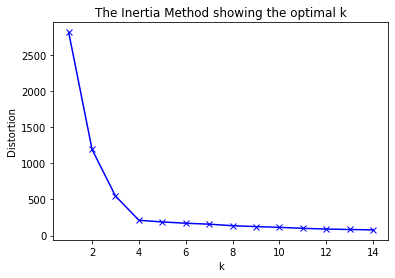

In [19]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Inertia Method showing the optimal k')
plt.show()

This again predicts the correct K

**Now what if we wanted to find the number of points in each cluster?**

In [22]:
distances = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0
}
for p in X:
    p = [p]
    min_dist = [0, float("inf")]
    for i, c in enumerate(kcluster.cluster_centers_):
        c = [c]
        dist = distance.cdist(p, c, 'euclidean')
        if dist < min_dist[1]:
            min_dist[0] = str(i)
            min_dist[1] = dist
            
    distances[min_dist[0]] += 1
    
distances

{'0': 75, '1': 75, '2': 75, '3': 75}

## Now let's combine Text Processing and K-means clustering! 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

So let's say we have these sentences, and we want to cluster them based on topics. Looks like here we have 2 main topics which is cat or kitty and then google. 

### 1. Create Bag of Words out of these sentences
Here we can use the stop_words='english' parameters to remove stop words like and, to, for and so on..

In [32]:
vectorizer = CountVectorizer(stop_words='english')
bow = vectorizer.fit_transform(sentences)
bow.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

## 2. Cluster this BOW using K-means clustering

In [33]:
kcluster = KMeans(n_clusters=2)
kcluster.fit(bow)
kcluster.cluster_centers_

array([[0.  , 0.  , 0.25, 0.5 , 0.25, 0.5 , 0.  , 0.25, 0.25, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.  , 0.25, 0.25,
        0.  , 0.25, 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25],
       [0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.25,
        0.25, 1.  , 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
        0.25, 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ]])

## 3. Figure out what sentences are in what group!

In [35]:
kcluster.labels_

array([0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
groups = {
    '0': [],
    '1': []
}

for cluster in kcluster.labes